<a href="https://colab.research.google.com/github/Goof1999/Design-Optimization/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [91]:
import torch as tr
import numpy as np
from torch.autograd import Variable

Setting up the problem

In [92]:
x1 = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x2 = 1-x1
x1 = tr.tensor(x1, requires_grad=False, dtype=tr.float32)
x2 = tr.tensor(x2, requires_grad=False, dtype=tr.float32)
a=np.array([[8.07131, 1730.63, 233.426], [7.43155, 1554.679, 240.337]])
T = 20 # C to K
psat_w = 10**(a[0,0]-a[0,1]/(T+a[0,2]))
psat_di = 10**(a[1,0]-a[1,1]/(T+a[1,2]))
p = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])
p = tr.tensor(p, requires_grad=False, dtype=tr.float32)

# Inital guess for A is (1,1)
A = Variable(tr.tensor([1.0, 1.0]), requires_grad=True)


In [93]:
c = 0.0001
for i in range(1000):
  pred = x1*tr.exp(A[0] * (A[1] * x2 / (A[0] * x1 + A[1] * x2))**2)*psat_w + x2*tr.exp(A[1] * (A[0] * x1 / (A[0] * x1 + A[1] * x2))**2)*psat_di

  loss = (pred-p)**2
  loss = loss.sum()

  loss.backward()

  with tr.no_grad():
    A -= c*A.grad
    A.grad.zero_()

print(A.data.numpy())
print(loss.data.numpy())

[1.9584141 1.68919  ]
0.67018914


In [94]:
pred

tensor([28.8241, 34.6443, 36.4530, 36.8673, 36.8740, 36.7498, 36.3904, 35.3848,
        32.9478, 27.7300, 17.4733], grad_fn=<AddBackward0>)

In [95]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pressure')

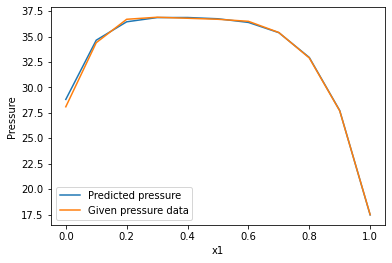

In [96]:
plt.plot(x1, pred.data.numpy(),label='Predicted pressure')
plt.plot(x1, p.data.numpy(),label='Given pressure data')
plt.legend()
plt.xlabel('x1')
plt.ylabel('Pressure')